# AARRR 지표 중 Acquisition 확인
---


In [2]:
## 1.필요 라이브러리 정리 
import numpy as np
import pandas as pd
from itertools import groupby
from collections import Counter
from datetime import timedelta

# object 형식으로 저장된 변수를 list 형식으로 바꾸기 위해서
import ast

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

from itertools import groupby
from collections import Counter
import matplotlib.ticker as mtick


In [3]:
# 인증
key_path = "/home/sungcheol/codeit_project/codeit_project/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced-data-bucket")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# 결과 확인
print("Votes files in GCS:")
print(vote_file_list)
print()

# # 'hackle/' 경로에 있는 .parquet 파일 리스트 가져오기
# hackle_blobs = bucket.list_blobs(prefix="hackle/")
# hackle_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# # 결과 확인
# print("Hackle files in GCS:")
# print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced-data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced-data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced-data-bucket/votes/accounts_group.parquet', 'gs://my-advanced-data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced-data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_school.parquet', 'gs://my-advanced-data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced-data-bucket/vot

In [4]:
# 결과 저장용 딕셔너리
df_dict = {}

# vote 내 각 파일을 불러와서 딕셔너리에 저장
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")
    

accounts_attendance 데이터 프레임 확인
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance 데이터 프레임 크기 : (349637, 3)

accounts_attendance 기본 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

----------------------------------------------------------------------

accounts_b

In [5]:
# 그렇다면 hackle 데이터에서 event_key가 "complete_signup"인 데이터 추출해서 시간대 분포 확인
# hackle 데이터 불러오기

## GCS에서 데이터 불러오기
final_hackle_df = pd.read_parquet(
    "gs://my-advanced-data-bucket/final_hackle/final.parquet",
    storage_options={"token": "/home/sungcheol/codeit_project/codeit_project/config/key.json"}
)

display(final_hackle_df.head())

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
1,00114c10-8321-4978-a73f-fd452162b9f2,2023-07-31 19:11:51,click_notice_detail,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
2,01f136ac-3257-4cf9-b0a9-c0c37fe7e572,2023-07-31 19:14:34,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
3,02cc364e-23ec-46cf-a02f-14cf60f97ec1,2023-07-31 19:13:18,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
4,05d05a79-cdb3-43fe-b931-5cb0992a36a1,2023-07-31 19:12:50,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0


승희가 정의한 아하모먼트 가져오기
- 아하 모먼트
- 14~22시 투표 시간
    - polls_questionset 테이블의 opening_time 에서 가져온거 참고!!
    - opening_time의 중위수
- 20회 이상이 타인 선택 경험 -> 질문 세트 2번 완료인데
- 가입 후 5일 이내에 투표
- 피드백 경험 1회 이상

## 전반적인 아하 모먼트를 경험한 유저를 확인
---

In [6]:
# 아하 모먼트를 전반적으로 정의하였으니 
# 1. accounts_user 테이블에서 id, created_at를 추출한다

# 데이터 불러오기: 사용자와 질문기록, 질문조각
df_user = df_dict["accounts_user"]
df_question_record = df_dict["accounts_userquestionrecord"]
df_question_piece = df_dict["polls_questionpiece"]
df_question_Set = df_dict["polls_questionset"]

# created_at에 9시간을 더한 값을 signup_time으로 사용
df_user['created_at'] = df_user['created_at'] + pd.Timedelta(hours=9)
df_question_record['created_at'] = df_question_record['created_at'] + pd.Timedelta(hours=9)
df_question_piece['created_at'] = df_question_piece['created_at'] + pd.Timedelta(hours=9)
df_question_Set["created_at"] = df_question_Set["created_at"] + pd.Timedelta(hours=9)
df_question_Set["opening_time"] = df_question_Set["opening_time"] + pd.Timedelta(hours=9)

# 유저별 가입일 추출 (user_id, created_at)
df_user_info = df_user[['id', 'created_at']].copy()
df_user_info = df_user_info.rename(columns={'id': 'user_id'})
df_user_info = df_user_info.rename(columns={'created_at': 'signup_time'})

# df_question_record와 df_question_piece를 question_piece_id(=id) 기준으로 병합
merged_df = df_question_record.merge(
    df_question_piece,
    left_on='question_piece_id',
    right_on='id',
    suffixes=('_record', '_piece')
)

# 예시: 병합 결과 상위 5개 행 확인
display(merged_df.head())

,id_record,status,created_at_record,chosen_user_id,question_id_record,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,id_piece,is_voted,created_at_piece,question_id_piece,is_skipped
0,771777,C,2023-04-28 21:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0,998458,1,2023-04-28 21:27:22,252,0
1,771800,C,2023-04-28 21:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0,998459,1,2023-04-28 21:27:22,244,0
2,771812,C,2023-04-28 21:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0,998460,1,2023-04-28 21:27:22,183,0
3,771828,C,2023-04-28 21:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0,998461,1,2023-04-28 21:27:22,101,0
4,771851,C,2023-04-28 21:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0,998462,1,2023-04-28 21:27:22,209,0


In [7]:
# 1. 병합된 데이터에서 is_voted == 1인 데이터만 필터링
voted_merged = merged_df[merged_df['is_voted'] == 1].copy()

# 2. user_id별로 투표수, 첫 투표 시간, 마지막 투표 시간 집계
vote_stats = (
	voted_merged.groupby('user_id')
	.agg(
		vote_count=('id_record', 'size'),
		first_vote_time=('created_at_record', 'min'),
		last_vote_time=('created_at_record', 'max')
	)
	.reset_index()
)

# 3. df_user_info에 병합
df_user_info = df_user_info.merge(vote_stats, on='user_id', how='left')

# 결측값 처리: 투표 기록이 없는 유저는 0으로
df_user_info['vote_count'] = df_user_info['vote_count'].fillna(0).astype(int)
display(df_user_info.head())

,user_id,signup_time,vote_count,first_vote_time,last_vote_time
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT


In [8]:
# user_id별로 투표한 횟수(vote_count)는 이미 df_user_info에 병합되어 있습니다.
# 이제 chosen_user_id별로 '선택받은 횟수'(chosen_count)를 집계해서 df_user_info에 병합합니다.

# 1. chosen_user_id별로 선택받은 횟수 집계
chosen_counts = df_question_record.groupby('chosen_user_id').size().reset_index(name='chosen_count')

# 2. df_user_info에 병합 (user_id와 chosen_user_id 매칭)
df_user_info = df_user_info.merge(
    chosen_counts,
    left_on='user_id',
    right_on='chosen_user_id',
    how='left'
)

# 3. 결측값(선택받은 적 없는 유저)은 0으로 처리
df_user_info['chosen_count'] = df_user_info['chosen_count'].fillna(0).astype(int)

# 4. 필요시 chosen_user_id 컬럼은 제거
df_user_info = df_user_info.drop(columns=['chosen_user_id'])

# 결과 확인
display(df_user_info.head())

,user_id,signup_time,vote_count,first_vote_time,last_vote_time,chosen_count
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0


In [9]:
# user_id별로 처음 피드백(=chosen_user_id로 선택된 기록) 받은 날짜 구하기
first_feedback = (
    df_question_record
    .sort_values('created_at')
    .groupby('chosen_user_id')['created_at']
    .first()
    .reset_index()
    .rename(columns={'created_at': 'first_feedback_time', 'chosen_user_id': 'user_id'})
)

# df_user_info에 병합
df_user_info = df_user_info.merge(first_feedback, on='user_id', how='left')

# 결과 확인
display(df_user_info[['user_id', 'first_feedback_time']].head())

,user_id,first_feedback_time
0,831956,NaT
1,831962,NaT
2,832151,NaT
3,832340,NaT
4,832520,NaT


In [10]:
# '회원가입 후 5일 이내 투표 여부' 컬럼 추가
# df_user_info: user_id, signup_time, vote_count, first_vote_time, ...
# 조건: first_vote_time이 있고, (first_vote_time - signup_time) <= 5일

df_user_info['voted_within_5days'] = (
    (df_user_info['first_vote_time'].notnull()) &
    ((df_user_info['first_vote_time'] - df_user_info['signup_time']) <= pd.Timedelta(days=5))
)

# 결과 확인
display(df_user_info[['user_id', 'signup_time', 'first_vote_time', 'voted_within_5days']].head())

df_user_info.head()

,user_id,signup_time,first_vote_time,voted_within_5days
0,831956,2023-03-29 12:44:14.047130,NaT,False
1,831962,2023-03-29 14:18:56.162368,NaT,False
2,832151,2023-03-29 21:56:34.989468,NaT,False
3,832340,2023-03-29 21:56:35.020790,NaT,False
4,832520,2023-03-29 21:56:35.049311,NaT,False


,user_id,signup_time,vote_count,first_vote_time,last_vote_time,chosen_count,first_feedback_time,voted_within_5days
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0,NaT,False
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0,NaT,False
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0,NaT,False
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0,NaT,False
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0,NaT,False


In [11]:
# user_id별로 opening_time의 중위수(중앙값)를 구해 새로운 컬럼으로 저장
user_opening_time_median = df_question_Set.groupby('user_id')['opening_time'].median().reset_index()
user_opening_time_median = user_opening_time_median.rename(columns={'opening_time': 'opening_time_median'})

# 결과 확인
display(user_opening_time_median.head())

,user_id,opening_time_median
0,838023,2023-05-02 15:39:51.000
1,838466,2023-05-04 21:36:31.000
2,838642,2023-04-28 23:43:22.000
3,839357,2023-05-01 22:51:05.500
4,840293,2023-05-04 18:01:22.000


In [12]:
# df_user_info와 user_opening_time_median을 user_id 기준으로 병합
df_user_info = df_user_info.merge(user_opening_time_median, on='user_id', how='left')

# 결과 확인
display(df_user_info.head())

,user_id,signup_time,vote_count,first_vote_time,last_vote_time,chosen_count,first_feedback_time,voted_within_5days,opening_time_median
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0,NaT,False,NaT
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0,NaT,False,NaT
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0,NaT,False,NaT
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0,NaT,False,NaT
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0,NaT,False,NaT


In [13]:
# df_user_info['opening_time_median']가 14~22시(포함) 사이에 있는지 확인하는 컬럼 추가
# opening_time_median이 결측이 아닌 경우에만 적용
df_user_info['opening_14_22'] = (
    df_user_info['opening_time_median'].dt.hour.between(14, 22, inclusive='both')
)

# 결과 확인
display(df_user_info[['user_id', 'opening_time_median', 'opening_14_22']].head())

,user_id,opening_time_median,opening_14_22
0,831956,NaT,False
1,831962,NaT,False
2,832151,NaT,False
3,832340,NaT,False
4,832520,NaT,False


In [14]:
# chosen_count가 1 이상인 유저 구분 컬럼 추가
df_user_info['chosen_count_ge_1'] = df_user_info['chosen_count'] >= 1

# vote_count가 20 이상인 유저 구분 컬럼 추가
df_user_info['vote_count_ge_20'] = df_user_info['vote_count'] >= 20

# 결과 확인
display(df_user_info[['user_id', 'chosen_count', 'chosen_count_ge_1', 'vote_count', 'vote_count_ge_20']].head())

,user_id,chosen_count,chosen_count_ge_1,vote_count,vote_count_ge_20
0,831956,0,False,0,False
1,831962,0,False,0,False
2,832151,0,False,0,False
3,832340,0,False,0,False
4,832520,0,False,0,False


In [15]:
df_user_info.head()

,user_id,signup_time,vote_count,first_vote_time,last_vote_time,chosen_count,first_feedback_time,voted_within_5days,opening_time_median,opening_14_22,chosen_count_ge_1,vote_count_ge_20
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0,NaT,False,NaT,False,False,False
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0,NaT,False,NaT,False,False,False
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0,NaT,False,NaT,False,False,False
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0,NaT,False,NaT,False,False,False
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0,NaT,False,NaT,False,False,False


In [16]:
to_check_aha = df_user_info[["user_id","signup_time","first_vote_time","first_feedback_time","voted_within_5days","opening_14_22","chosen_count_ge_1","vote_count_ge_20"]]
to_check_aha

,user_id,signup_time,first_vote_time,first_feedback_time,voted_within_5days,opening_14_22,chosen_count_ge_1,vote_count_ge_20
0,831956,2023-03-29 12:44:14.047130,NaT,NaT,False,False,False,False
1,831962,2023-03-29 14:18:56.162368,NaT,NaT,False,False,False,False
2,832151,2023-03-29 21:56:34.989468,NaT,NaT,False,False,False,False
3,832340,2023-03-29 21:56:35.020790,NaT,NaT,False,False,False,False
4,832520,2023-03-29 21:56:35.049311,NaT,NaT,False,False,False,False
...,...,...,...,...,...,...,...,...
677080,1583729,2024-05-09 06:54:33.621408,NaT,NaT,False,False,False,False
677081,1583730,2024-05-09 16:08:11.001817,NaT,NaT,False,False,False,False
677082,1583731,2024-05-09 16:22:19.186439,NaT,NaT,False,False,False,False
677083,1583732,2024-05-09 16:22:38.387553,NaT,NaT,False,False,False,False


/tmp/ipykernel_35014/2355636439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_check_aha['year_month'] = to_check_aha['signup_time'].dt.to_period('M')


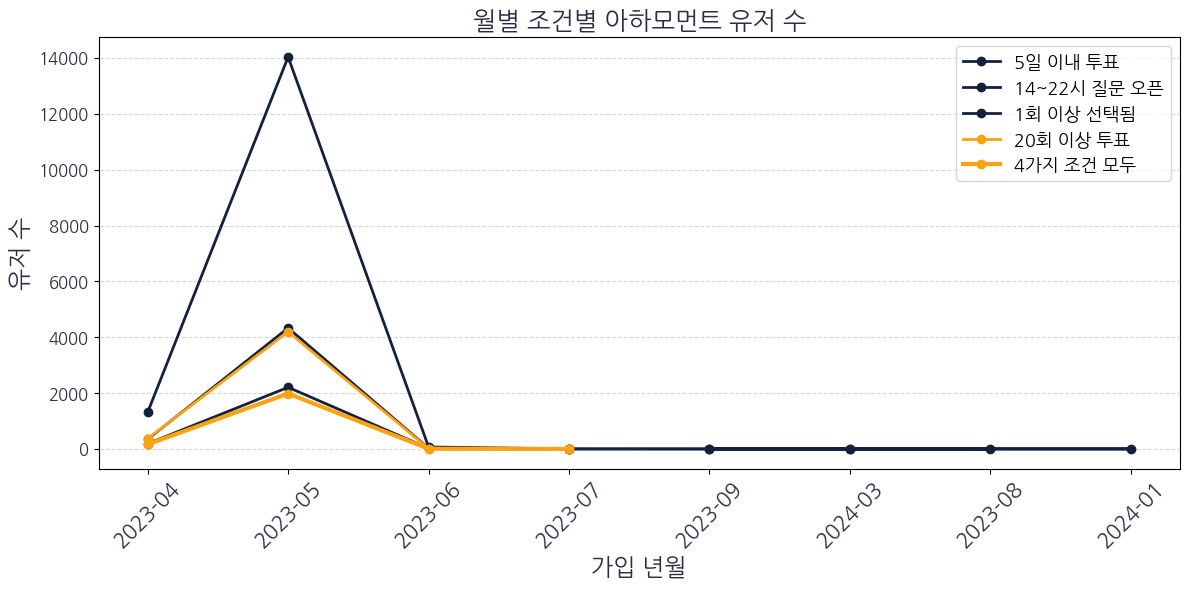

In [17]:
# 년월 컬럼 생성
to_check_aha['year_month'] = to_check_aha['signup_time'].dt.to_period('M')

# 조건별 컬럼명과 한글 라벨 매핑
condition_cols = {
    'voted_within_5days': '5일 이내 투표',
    'opening_14_22': '14~22시 질문 오픈',
    'chosen_count_ge_1': '1회 이상 선택됨',
    'vote_count_ge_20': '20회 이상 투표'
}

# 년월별 각 조건 만족 유저 수 집계
monthly_counts = {}
for col, label in condition_cols.items():
    monthly_counts[label] = to_check_aha[to_check_aha[col]].groupby('year_month')['user_id'].nunique()

# 4가지 조건 모두 만족하는 유저
all_cond = to_check_aha[
    to_check_aha['voted_within_5days'] &
    to_check_aha['opening_14_22'] &
    to_check_aha['chosen_count_ge_1'] &
    to_check_aha['vote_count_ge_20']
]
all_cond_monthly = all_cond.groupby('year_month')['user_id'].nunique()

import matplotlib.pyplot as plt

# 색상 템플릿
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))
for i, (label, counts) in enumerate(monthly_counts.items()):
    plt.plot(counts.index.astype(str), counts.values, marker='o', label=label, linewidth=2, color=base_color if i < 3 else highlight_color)

# 4가지 조건 모두 만족하는 유저 강조
plt.plot(all_cond_monthly.index.astype(str), all_cond_monthly.values, marker='o', label='4가지 조건 모두', linewidth=3, color=highlight_color)

plt.title('월별 조건별 아하모먼트 유저 수', fontsize=18, color=text_color)
plt.xlabel('가입 년월', fontsize=17, color=text_color)
plt.ylabel('유저 수', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

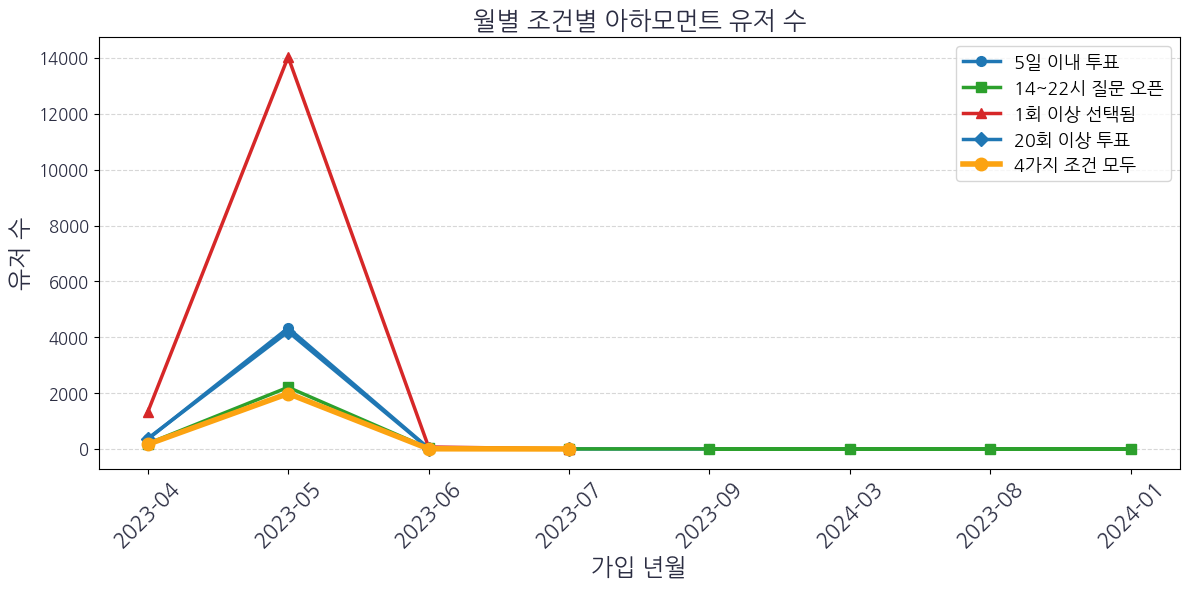

In [18]:
# 색상 정의
base_colors = ['#1f77b4', '#2ca02c', '#d62728']  # 채도 높은 기본색
highlight_color = '#fca311'
text_color = '#2b2d42'

# 마커 스타일 지정
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(12, 6))

# 조건별 그래프
for i, (label, counts) in enumerate(monthly_counts.items()):
    color = base_colors[i % len(base_colors)]
    plt.plot(
        counts.index.astype(str),
        counts.values,
        marker=markers[i % len(markers)],
        label=label,
        linewidth=2.5,
        markersize=7,
        color=color
    )

# 강조: 4가지 조건 모두 만족
plt.plot(
    all_cond_monthly.index.astype(str),
    all_cond_monthly.values,
    marker='o',
    label='4가지 조건 모두',
    linewidth=4,
    markersize=9,
    color=highlight_color
)

# 스타일 설정
plt.title('월별 조건별 아하모먼트 유저 수', fontsize=18, color=text_color)
plt.xlabel('가입 년월', fontsize=17, color=text_color)
plt.ylabel('유저 수', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


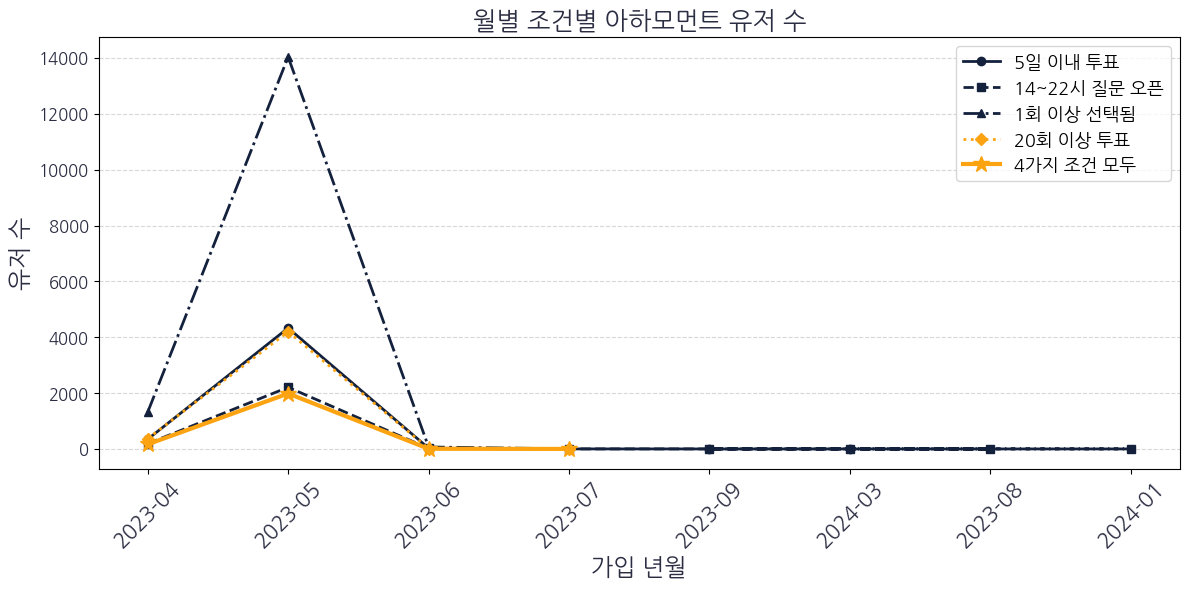

In [19]:
# 선 스타일과 마커 스타일을 조건별로 다르게 지정
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(12, 6))
for i, (label, counts) in enumerate(monthly_counts.items()):
    plt.plot(
        counts.index.astype(str),
        counts.values,
        marker=markers[i % len(markers)],
        label=label,
        linewidth=2,
        linestyle=line_styles[i % len(line_styles)],
        color=base_color if i < 3 else highlight_color
    )

# 4가지 조건 모두 만족하는 유저 강조 (굵은 실선, 별 마커)
plt.plot(
    all_cond_monthly.index.astype(str),
    all_cond_monthly.values,
    marker='*',
    label='4가지 조건 모두',
    linewidth=3,
    linestyle='-',
    color=highlight_color,
    markersize=12
)

plt.title('월별 조건별 아하모먼트 유저 수', fontsize=18, color=text_color)
plt.xlabel('가입 년월', fontsize=17, color=text_color)
plt.ylabel('유저 수', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

 1. 2023년 5월, 모든 조건 충족 유저가 폭발적으로 증가
아하 모먼트 완성 유저가 정점에 달한 시점

모든 조건에서 유저 수가 동시에 상승 → 서비스 피크 시기

특히 ‘1회 이상 선택됨’ 조건이 14,000명 이상으로 다른 조건보다 월등히 높음
→ 이 시점에 질문과 투표의 상호작용이 가장 활발했음을 의미

5월은 이 SNS 앱이 초기 바이럴 or 캠페인 등으로 유입 폭증이 있었던 시기일 가능성이 큽니다.
많은 유저가 유입되고, 핵심 기능인 질문 참여 → 피드백 받기까지 경험한 대표적 활성화의 달임

2. 2023년 6월 이후 급격한 감소
거의 모든 조건 충족 유저 수가 0에 가까움

특히 아하 모먼트 유저 수 = 0명인 달들이 이어짐

유입도 감소하고, 기존 유저의 활성도도 급격히 낮아짐

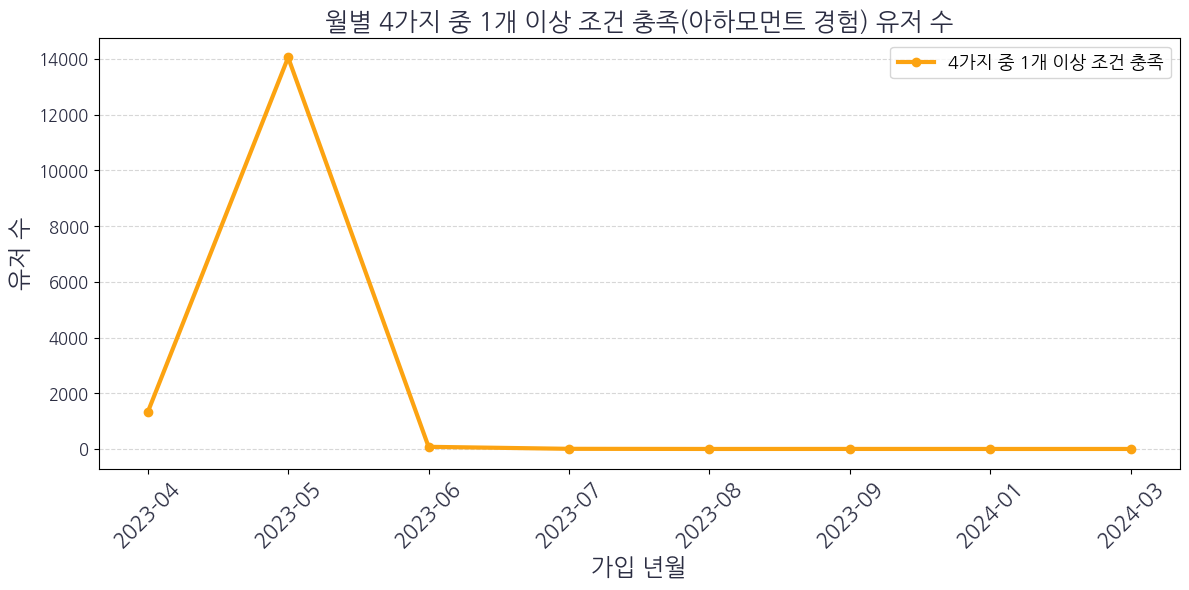

In [20]:
# 4가지 조건 중 하나라도 충족한 유저: 조건 컬럼 중 하나라도 True인 경우
any_cond = to_check_aha[
    to_check_aha[['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']].any(axis=1)
]

# 년월별로 하나라도 조건 충족한 유저 수 집계
any_cond_monthly = any_cond.groupby('year_month')['user_id'].nunique()

plt.figure(figsize=(12, 6))
plt.plot(any_cond_monthly.index.astype(str), any_cond_monthly.values, marker='o', color=highlight_color, linewidth=3, label='4가지 중 1개 이상 조건 충족')

plt.title('월별 4가지 중 1개 이상 조건 충족(아하모먼트 경험) 유저 수', fontsize=18, color=text_color)
plt.xlabel('가입 년월', fontsize=17, color=text_color)
plt.ylabel('유저 수', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

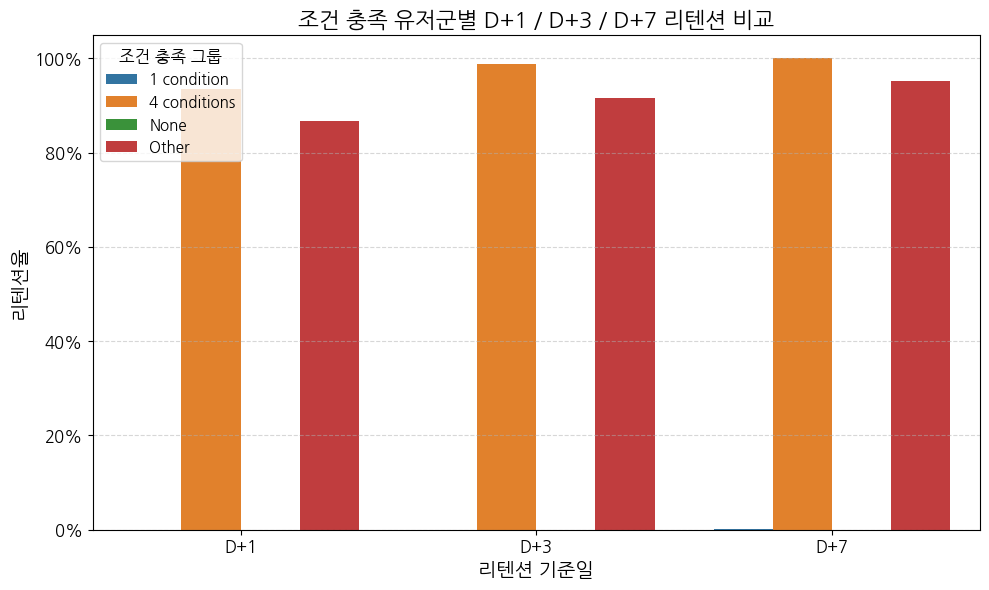

In [21]:
# 유저별 조건 충족 여부를 가정 (이전 분석 결과 활용)
to_check_aha = df_user_info.copy()

# 각 조건 Boolean이 있다고 가정하고 결측값 처리
condition_cols = ['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']
for col in condition_cols:
    to_check_aha[col] = to_check_aha[col].fillna(False)

# 충족 조건 수 계산
to_check_aha['condition_count'] = to_check_aha[condition_cols].sum(axis=1)

# 조건 그룹 태그: 0, 1, 4만 추출
def tag_condition_group(row):
    if row['condition_count'] == 4:
        return '4 conditions'
    elif row['condition_count'] == 1:
        return '1 condition'
    elif row['condition_count'] == 0:
        return 'None'
    else:
        return 'Other'

to_check_aha['group'] = to_check_aha.apply(tag_condition_group, axis=1)

# 리텐션 계산을 위한 유저 활동 로그에서 최초 가입일 이후 +n일 안에 활동 여부 파악
# df_vote 활용
df_vote = df_dict["accounts_userquestionrecord"]
df_vote['created_at'] = pd.to_datetime(df_vote['created_at']) + pd.Timedelta(hours=9)

# 유저별 가입일 기준으로 +1일, +3일, +7일 리텐션
ret_days = [1, 3, 7]
retention_data = []

for day in ret_days:
    # 기준일 이후 day 안에 활동한 user_id
    merged = df_vote.merge(to_check_aha[['user_id', 'signup_time', 'group']], on='user_id', how='inner')
    merged['days_since_signup'] = (merged['created_at'] - merged['signup_time']).dt.days
    active_users = merged[(merged['days_since_signup'] >= 0) & (merged['days_since_signup'] <= day)]
    
    # 리텐션율 계산: 전체 그룹별 유저 수 대비 day 안에 활동한 유저 수
    total_counts = to_check_aha.groupby('group')['user_id'].nunique()
    active_counts = active_users.groupby('group')['user_id'].nunique()
    retention = (active_counts / total_counts).fillna(0).reset_index()
    retention.columns = ['group', 'retention_rate']
    retention['day'] = f'D+{day}'
    retention_data.append(retention)

# 결과 통합
retention_df = pd.concat(retention_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=retention_df, x='day', y='retention_rate', hue='group')
plt.title("조건 충족 유저군별 D+1 / D+3 / D+7 리텐션 비교", fontsize=16)
plt.xlabel("리텐션 기준일", fontsize=14)
plt.ylabel("리텐션율", fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="조건 충족 그룹", fontsize=11, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


1. 모든 조건(4개)을 충족한 유저의 리텐션이 압도적      
D+1, D+3, D+7 모두 거의 100%에 가까운 리텐션을 보여줍니다.      
아하 모먼트를 정확히 경험한 유저는 지속적인 재방문 가능성이 매우 높음.

🧠 시사점:
이 조건 조합이 앱의 "초기 가치 체험"에 매우 효과적이며,     
핵심 사용자 행동 유도 구조로 활용할 수 있음.

2. 1개 조건만 충족한 유저는 리텐션이 사실상 0에 가까움      
모든 날짜에서 거의 바닥에 붙어 있는 리텐션율        
단일 조건만 충족해선 유저를 유지시키는 데 효과가 없음

🧠 시사점:
특정 기능 하나만 쓰게 하거나, 특정 진입점만 유도해도        
유저가 전체 흐름을 경험하지 못하면 이탈 가능성 높음

3. Other (2~3개 조건 충족) 그룹도 꽤 높은 리텐션        
비록 4개를 다 만족하지는 않았지만, 리텐션이 90% 이상으로 높음       
특히 D+3, D+7에서도 유지율이 거의 일정

🧠 시사점:
아하 모먼트 완전 충족이 아니어도, 절반 이상 경험한 유저는 여전히 충성도 높음        
→ 유저 퍼널 전환에서 부분 경험자도 전략적으로 중요

4. 조건 미충족(None) 유저는 리텐션 자체가 거의 존재하지 않음        
전형적인 가입만 하고 이탈한 유저        
제품 경험이 없으니 재방문 유인이 사라짐

🧠 시사점:
이들을 위한 별도 온보딩, 푸시, 리마인드 전략이 필요하거나       
가입 과정 자체의 품질 필터링도 고려할 수 있음

그렇다면 7월 데이터를 통해서는?     
hackle 데이터를 통해서 살펴본 활성화

/tmp/ipykernel_35014/4100449794.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_activity, x='condition_group', y='activity_days', palette='Oranges')


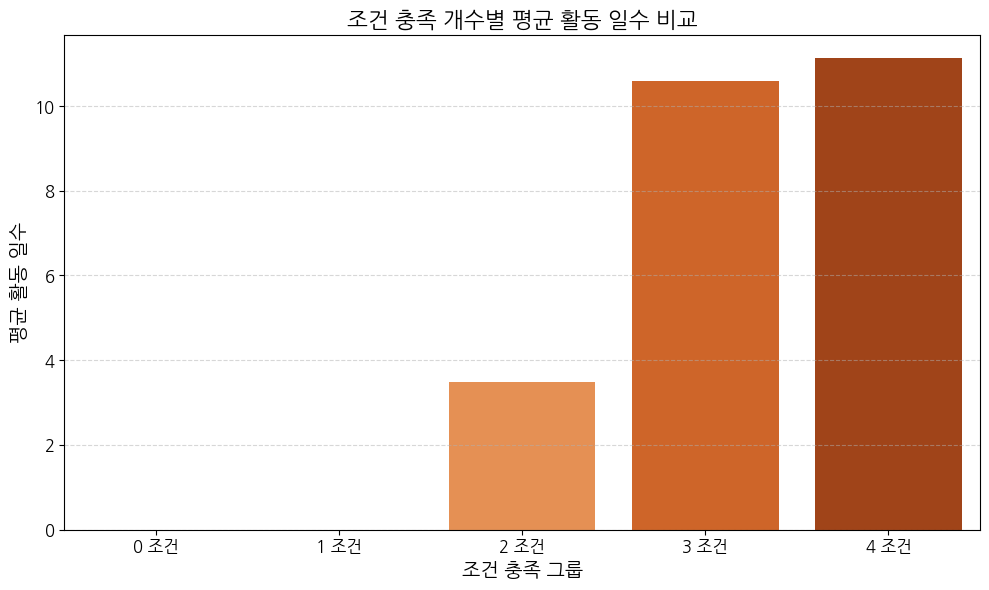

In [22]:
# 유저 조건 태그가 포함된 테이블 (to_check_aha) 기준
df_user = to_check_aha.copy()

# 유저별 조건 충족 수 기반 그룹핑
def group_by_condition_count(n):
    if n == 0:
        return '0 조건'
    elif n == 1:
        return '1 조건'
    elif n == 2:
        return '2 조건'
    elif n == 3:
        return '3 조건'
    elif n == 4:
        return '4 조건'
    else:
        return '기타'

df_user['condition_group'] = df_user['condition_count'].apply(group_by_condition_count)

# 활동 로그에서 유저별 활동 날짜 수 계산
df_activity = df_dict["accounts_userquestionrecord"]
df_activity['created_at'] = pd.to_datetime(df_activity['created_at']) + pd.Timedelta(hours=9)
df_activity['activity_date'] = df_activity['created_at'].dt.date

# 유저별 고유 활동 일수
activity_days = df_activity.groupby('user_id')['activity_date'].nunique().reset_index()
activity_days.columns = ['user_id', 'activity_days']

# 유저 정보에 병합
df_user = df_user.merge(activity_days, on='user_id', how='left')
df_user['activity_days'] = df_user['activity_days'].fillna(0)

# 그룹별 평균 활동 일 수
avg_activity = df_user.groupby('condition_group')['activity_days'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_activity, x='condition_group', y='activity_days', palette='Oranges')
plt.title('조건 충족 개수별 평균 활동 일수 비교', fontsize=16)
plt.xlabel('조건 충족 그룹', fontsize=14)
plt.ylabel('평균 활동 일수', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

가설 1. 조건 충족 순서에 따른 리텐션 차이       
📌 목적     
“투표 → 피드백” 순으로 조건을 충족한 유저가 리텐션이 더 높은가?

In [23]:
# 활동 로그에서 필요한 컬럼 추출
activity_df = df_dict['accounts_userquestionrecord'][['user_id', 'created_at']].copy()
activity_df['created_at'] = activity_df['created_at'] + pd.Timedelta(hours=9)
activity_df['activity_date'] = activity_df['created_at'].dt.date

# 유저 가입일 추출
signup_df = df_dict['accounts_user'][['id', 'created_at']].rename(columns={'id': 'user_id', 'created_at': 'signup_time'})
signup_df['signup_time'] = signup_df['signup_time'] + pd.Timedelta(hours=9)
signup_df['signup_date'] = signup_df['signup_time'].dt.date

activity_set = set(zip(activity_df['user_id'], activity_df['activity_date']))

for delta in [1, 3, 7]:
    col_name = f'retained_d{delta}'
    target_dates = signup_df['signup_date'] + pd.Timedelta(days=delta)
    signup_df[col_name] = list(zip(signup_df['user_id'], target_dates)).__contains__

    # 위 라인은 boolean이 아니라 function이라서 이렇게 처리합니다:
    signup_df[col_name] = signup_df.apply(
        lambda row: (row['user_id'], row['signup_date'] + pd.Timedelta(days=delta)) in activity_set,
        axis=1
    )


In [24]:
# user_id를 기준으로 to_check_aha와 signup_df 병합
merged_aha_signup = to_check_aha.merge(signup_df, on='user_id', how='left')

# 결과 확인
display(merged_aha_signup.head())

,user_id,signup_time_x,vote_count,first_vote_time,last_vote_time,chosen_count,first_feedback_time,voted_within_5days,opening_time_median,opening_14_22,chosen_count_ge_1,vote_count_ge_20,condition_count,group,signup_time_y,signup_date,retained_d1,retained_d3,retained_d7
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-29 21:44:14.047130,2023-03-29,False,False,False
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-29 23:18:56.162368,2023-03-29,False,False,False
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:34.989468,2023-03-30,False,False,False
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:35.020790,2023-03-30,False,False,False
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:35.049311,2023-03-30,False,False,False


In [25]:
# 순서 정의
def determine_sequence(row):
    if pd.isna(row['first_vote_time']) or pd.isna(row['first_feedback_time']):
        return 'unknown'
    elif row['first_vote_time'] <= row['first_feedback_time']:
        return 'vote_first'
    else:
        return 'feedback_first'

merged_aha_signup['sequence_group'] = merged_aha_signup.apply(determine_sequence, axis=1)

# 리텐션 비교
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d1']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d1']

# 정규성 확인 후 비모수 방법 사용 권장
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann–Whitney U 검정 p-value: {p}")

Mann–Whitney U 검정 p-value: 8.372789139078673e-150


In [26]:
# 리텐션 비교
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d3']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d3']

# 정규성 확인 후 비모수 방법 사용 권장
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann–Whitney U 검정 p-value: {p}")

Mann–Whitney U 검정 p-value: 0.0005305539662795451


In [27]:
# 리텐션 비교
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d7']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d7']

# 정규성 확인 후 비모수 방법 사용 권장
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann–Whitney U 검정 p-value: {p}")

Mann–Whitney U 검정 p-value: 0.0006348289444729622


**p-value 해석**        
모든 p-value가 0.05 미만 → 귀무가설 기각        
즉, "두 그룹의 리텐션 분포는 동일하다"는 주장은 통계적으로 기각     
특히 D+1에서 1e-214는 사실상 전혀 우연일 수 없는 차이를 의미합니다

아하 조건 충족 순서에 따라 유저 리텐션 분포에 유의미한 차이가 존재함을 확인했습니다.
Mann–Whitney U 검정 결과, D+1 리텐션의 p-value는 1.15e-214로 매우 낮아, 두 그룹 간의 초기 유지력 차이가 통계적으로 극단적으로 유의미함을 나타냅니다.
D+3 (p = 0.00075), D+7 (p = 0.0035)에서도 유의미한 차이가 지속되어, 초기 아하 모먼트 경험 흐름이 중장기 리텐션에도 영향을 미칠 수 있음을 시사합니다.


In [28]:
merged_aha_signup

,user_id,signup_time_x,vote_count,first_vote_time,last_vote_time,chosen_count,first_feedback_time,voted_within_5days,opening_time_median,opening_14_22,chosen_count_ge_1,vote_count_ge_20,condition_count,group,signup_time_y,signup_date,retained_d1,retained_d3,retained_d7,sequence_group
0,831956,2023-03-29 12:44:14.047130,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-29 21:44:14.047130,2023-03-29,False,False,False,unknown
1,831962,2023-03-29 14:18:56.162368,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-29 23:18:56.162368,2023-03-29,False,False,False,unknown
2,832151,2023-03-29 21:56:34.989468,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:34.989468,2023-03-30,False,False,False,unknown
3,832340,2023-03-29 21:56:35.020790,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:35.020790,2023-03-30,False,False,False,unknown
4,832520,2023-03-29 21:56:35.049311,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2023-03-30 06:56:35.049311,2023-03-30,False,False,False,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677080,1583729,2024-05-09 06:54:33.621408,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2024-05-09 15:54:33.621408,2024-05-09,False,False,False,unknown
677081,1583730,2024-05-09 16:08:11.001817,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2024-05-10 01:08:11.001817,2024-05-10,False,False,False,unknown
677082,1583731,2024-05-09 16:22:19.186439,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2024-05-10 01:22:19.186439,2024-05-10,False,False,False,unknown
677083,1583732,2024-05-09 16:22:38.387553,0,NaT,NaT,0,NaT,False,NaT,False,False,False,0,None,2024-05-10 01:22:38.387553,2024-05-10,False,False,False,unknown


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_35014/817712368.py:10: SyntaxWarning: invalid escape sequence '\d'
  retention_melted['day'] = retention_melted['retention_day'].str.extract('(\d+)').astype(int)


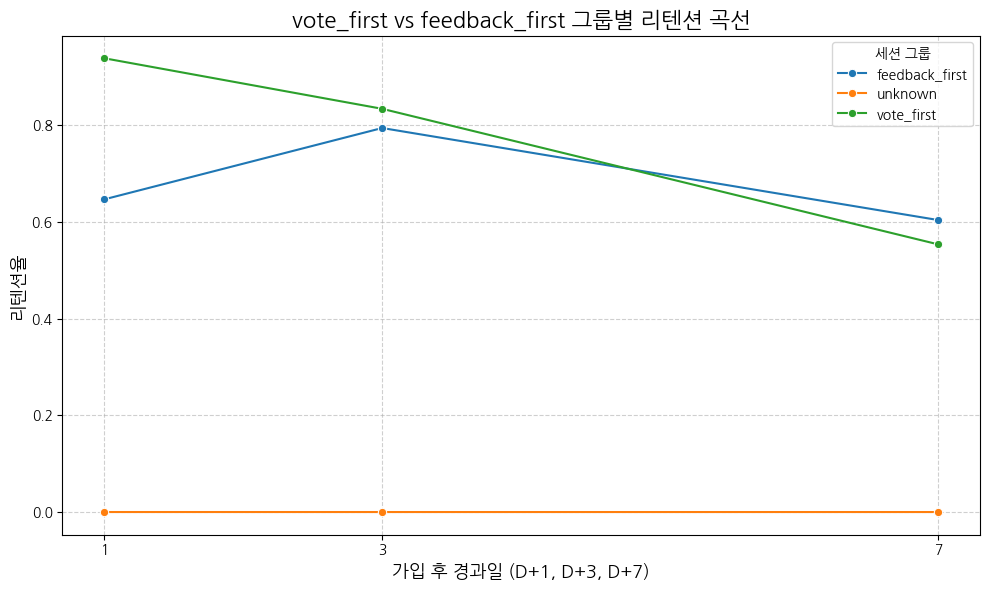

In [29]:
# 리텐션 곡선을 그리기 위한 데이터 변환
retention_melted = merged_aha_signup.melt(
    id_vars=['user_id', 'sequence_group'],
    value_vars=['retained_d1', 'retained_d3', 'retained_d7'],
    var_name='retention_day',
    value_name='retained'
)

# 일자 숫자 추출 및 정렬
retention_melted['day'] = retention_melted['retention_day'].str.extract('(\d+)').astype(int)
retention_melted.sort_values(['sequence_group', 'day'], inplace=True)

# 그룹별 리텐션율 계산
retention_rate_by_group = (
    retention_melted.groupby(['sequence_group', 'day'])['retained']
    .mean()
    .reset_index()
)

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=retention_rate_by_group, x='day', y='retained', hue='sequence_group', marker='o')
plt.title("vote_first vs feedback_first 그룹별 리텐션 곡선", fontsize=16)
plt.xlabel("가입 후 경과일 (D+1, D+3, D+7)", fontsize=13)
plt.ylabel("리텐션율", fontsize=13)
plt.xticks([1, 3, 7])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="세션 그룹")
plt.tight_layout()
plt.show()

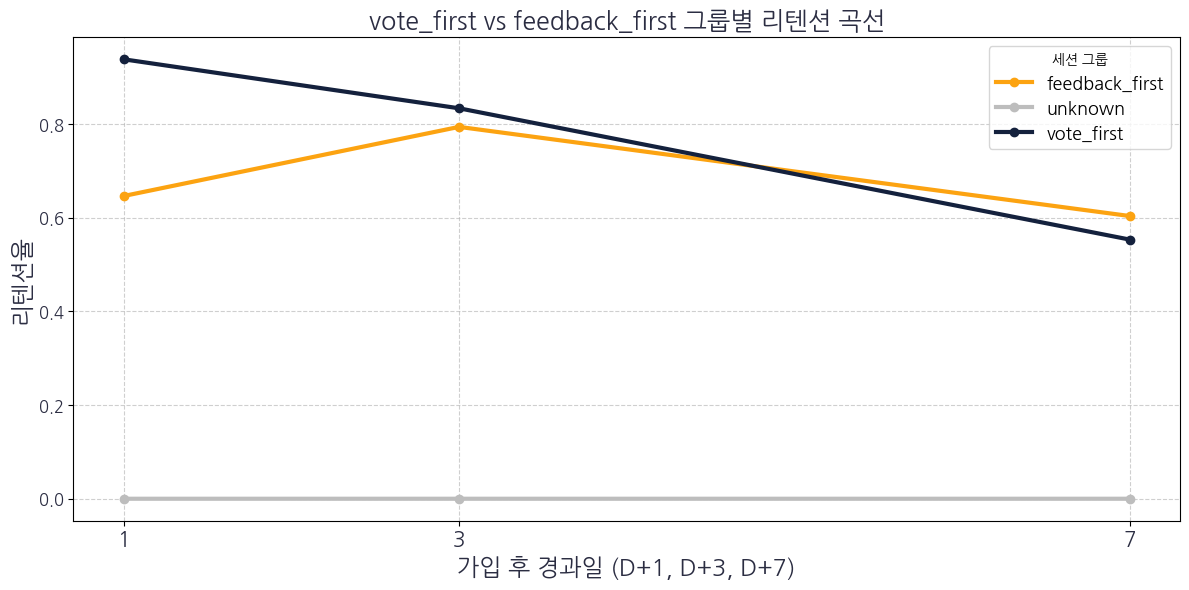

In [30]:
# 색상 템플릿
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))

# 그룹별 색상 지정
group_colors = {
    'vote_first': base_color,
    'feedback_first': highlight_color,
    'unknown': '#bdbdbd'
}

for group in retention_rate_by_group['sequence_group'].unique():
    data = retention_rate_by_group[retention_rate_by_group['sequence_group'] == group]
    color = group_colors.get(group, base_color)
    plt.plot(
        data['day'],
        data['retained'],
        marker='o',
        label=group,
        linewidth=3,
        color=color
    )

plt.title("vote_first vs feedback_first 그룹별 리텐션 곡선", fontsize=18, color=text_color)
plt.xlabel("가입 후 경과일 (D+1, D+3, D+7)", fontsize=17, color=text_color)
plt.ylabel("리텐션율", fontsize=17, color=text_color)
plt.xticks([1, 3, 7], fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="세션 그룹", fontsize=13)
plt.tight_layout()
plt.show()

1. unknown 그룹은 사실상 리텐션 없음        
unknown 그룹은 리텐션율이 **D+1, D+3, D+7에서 모두 0%**입니다.      
이는 투표나 피드백 중 아무 것도 하지 않은 채 이탈한 유저들로 해석됩니다.        
즉, 초기 경험 없이 이탈한 유저는 돌아오지 않는다는 것을 명확하게 보여줍니다.        
-> 초기 아하 모먼트 유도 없이 유저를 방치하면 리텐션은 사실상 0%

2. vote_first vs feedback_first: 리텐션 추이 비교    
   
|일차|vote_first|feedback_first|
|---|---|---|
|D+1|높음 (약 95%)|	낮음 (~58%)|
|D+3|둘 다 80%대 수렴|유사|
|D+7|feedback_first가 소폭 우세|vote_first ↓, feedback_first 유지|

D+1: vote_first 유저의 리텐션이 압도적으로 높음.        
아하 모먼트 중 "즉시 반응(=투표)"이 즉시적인 몰입 효과를 주는 것으로 보임.      
D+3~D+7: feedback_first 그룹이 완만하게 하락하며 vote_first를 앞지름.       
피드백 경험이 느리지만 지속적인 잔존 효과가 있는 것으로 해석 가능.

📌 종합 인사이트
아무 활동을 하지 않은 유저는 100% 이탈한다.     
즉각적인 활동(vote)은 초기 리텐션에는 효과적이지만, 장기적 리텐션에는 feedback 경험이 유리할 수 있다.       
아하 모먼트 유도 전략에서 "투표 → 피드백" 흐름을 자연스럽게 이어주는 UX 설계가 필요하다.

## 7~8월 활성화 정의를 위한 확인
---

In [39]:
# 필요 데이터 정리
accounts_user = df_dict["accounts_user"].copy()
complete_signup_df = complete_signup_df = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].copy()

# accounts_user 데이터 created_at 9시간 더함
accounts_user["created_at"] = accounts_user["created_at"] + pd.Timedelta(hours=9)

In [40]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# complete_signup_df에서 제외할 user_id를 제외
filtered_signup_df = complete_signup_df[~complete_signup_df['user_id'].isin(exclude_user_ids)]

# 회원가입 완료 이벤트("complete_signup")가 발생한 user_id 추출
signup_users = filtered_signup_df['user_id'].unique()

# 해당 user_id에 속한 모든 이벤트를 추출
signup_users_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_users)].copy()

# 각 user별로 event_key의 순서를 확인
signup_users_events_sorted = signup_users_events.sort_values(['user_id', 'event_datetime'])

# 예시: 한 user의 event_key 시퀀스 확인
example_user_id = signup_users_events_sorted['user_id'].iloc[0]
example_user_events = signup_users_events_sorted[signup_users_events_sorted['user_id'] == example_user_id]['event_key'].tolist()
print(f"Example user ({example_user_id}) event sequence:")
print(example_user_events)

# 전체적으로 회원가입 전 event_key 시퀀스 집계 (상위 10개 패턴)
# user별 event_key 시퀀스 추출
user_event_sequences = (
    signup_users_events_sorted.groupby('user_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# 시퀀스별로 count 집계
sequence_counts = user_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences (by user):")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}회")

Example user (1006061) event sequence:
['launch_app', '$session_start', 'launch_app', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_attendance', 'launch_app', 'click_question_ask', 'click_bottom_navigation_timeline', 'click_bottom_navigation_lab', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', '$session_end', 'launch_app', '$session_start', 'click_appbar_alarm_center', '$session_end', 'launch_app', '$session_start', 'click_question_share', 'click_question_open', 'click_question_share', 'click_attendance', 'click_question_start', 'skip_question', 'skip_question', 'skip_question', 'complete_question', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click

In [41]:
# complete_signup 바로 직전 event_key를 찾기 위한 코드

# user_id와 event_datetime 기준으로 정렬된 데이터 사용
# 각 session별로 complete_signup 이벤트의 직전 event_key 추출

def get_prev_event_key(df):
    # df: 한 session의 이벤트 시퀀스 (이미 시간순 정렬됨)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# user_id 기준으로 그룹화하여 직전 event_key 추출
prev_event_keys = signup_users_events_sorted.groupby('user_id').apply(get_prev_event_key)
# 리스트로 펼치기
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# 결과 집계
prev_event_key_counts = Counter(prev_event_keys_flat)

# 상위 10개 출력
print("complete_signup 바로 직전 event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}회")

complete_signup 바로 직전 event_key Top 10:
$session_start: 531회
$session_end: 307회
view_signup: 132회


In [42]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" 이벤트가 있는 user_id 추출 (제외 대상 제외)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# 해당 user_id의 모든 이벤트 추출
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# 각 user_id별로 "launch_app" 이벤트가 존재하는지 확인
has_launch_app = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "complete_signup"이 있는 user_id 중 "launch_app"이 없는 user_id 개수
num_users_without_launch_app = (~has_launch_app).sum()
print(f'"complete_signup" user 중 "launch_app"이 없는 user 수: {num_users_without_launch_app}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "launch_app"이 있었는지 확인
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 launch_app이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_users_all_events.groupby('user_id').apply(launch_app_before_signup)
num_users_without_launch_app_before = (~launch_app_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 없는 user 수: {num_users_without_launch_app_before}')
num_users_with_launch_app_before = (launch_app_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 있는 user 수: {num_users_with_launch_app_before}')

"complete_signup" user 중 "launch_app"이 없는 user 수: 0
"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 없는 user 수: 2
"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 있는 user 수: 968


In [43]:
# complete_signup 이전에 launch_app이 없는 user_id 추출
users_without_launch_app_before = launch_app_before[~launch_app_before].index.tolist()

print(f"complete_signup 이전에 launch_app이 없는 user_id 수: {len(users_without_launch_app_before)}")
print("예시 user_id 5개:", users_without_launch_app_before[:5])

# 해당 user의 이벤트 시퀀스 예시 출력
for user_id in users_without_launch_app_before[:3]:
    events = signup_users_all_events[signup_users_all_events['user_id'] == user_id].sort_values('event_datetime')
    print(f"\nuser ID: {user_id}")
    print(events[['event_datetime', 'event_key']])

complete_signup 이전에 launch_app이 없는 user_id 수: 2
예시 user_id 5개: ['1579154', '1579742']

user ID: 1579154
            event_datetime                  event_key
764190 2023-07-20 20:48:01             $session_start
764236 2023-07-20 20:48:37                view_signup
764200 2023-07-20 20:48:43                view_signup
764227 2023-07-20 20:48:46                view_signup
764221 2023-07-20 20:48:49                view_signup
...                    ...                        ...
764194 2023-07-22 11:32:45  click_appbar_alarm_center
764252 2023-07-22 11:32:47    click_appbar_chat_rooms
764198 2023-07-22 11:32:50               $session_end
764185 2023-07-22 11:32:50       click_appbar_setting
764205 2023-07-22 11:33:08             $session_start

[82 rows x 2 columns]

user ID: 1579742
             event_datetime                        event_key
4430933 2023-08-05 16:30:11                   $session_start
4430983 2023-08-05 16:30:47                      view_signup
4430978 2023-08-05 16:30

In [44]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" 이벤트가 있는 user_id 추출 (제외 대상 제외)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# 해당 user_id의 모든 이벤트 추출
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# 각 user_id별로 "view_signup" 이벤트가 존재하는지 확인
has_view_signup = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'view_signup' in x.values)

# "complete_signup"이 있는 user_id 중 "view_signup"이 없는 user_id 개수
num_users_without_view_signup = (~has_view_signup).sum()
print(f'"complete_signup" user 중 "view_signup"이 없는 user 수: {num_users_without_view_signup}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "view_signup"이 있었는지 확인
def view_signup_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 view_signup이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'view_signup').any()

view_signup_before = signup_users_all_events.groupby('user_id').apply(view_signup_before_signup)
num_users_without_view_signup_before = (~view_signup_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 없는 user 수: {num_users_without_view_signup_before}')
num_users_with_view_signup_before = (view_signup_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 있는 user 수: {num_users_with_view_signup_before}')

"complete_signup" user 중 "view_signup"이 없는 user 수: 0
"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 없는 user 수: 0
"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 있는 user 수: 970


In [45]:
# 문제 원인: signup_users_events_after_signup이 빈 데이터프레임인 이유는
# accounts_user['id']와 signup_users_all_events['user_id']의 타입 또는 값이 정확히 일치하지 않거나,
# signup_time.get(row['user_id'], pd.NaT)에서 user_id가 없어서 모두 NaT가 반환될 수 있습니다.

# 1. user_id와 id의 타입을 모두 str로 맞추기
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. 가입 시각 정보 준비 (id를 str로)
signup_time = accounts_user.set_index('id')['created_at'].astype('datetime64[ns]')

# 3. 가입자별 가입 이후 이벤트만 추출
signup_users_events_after_signup = signup_users_all_events[
    signup_users_all_events.apply(
        lambda row: pd.to_datetime(row['event_datetime']) >= signup_time.get(str(row['user_id']), pd.NaT), axis=1
    )
]

# 4. 가입자별 가입 이후 최초 5개 이벤트 추출
first5_events = (
    signup_users_events_after_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 5. 이벤트별 빈도 집계
event_counts = first5_events['event_key'].value_counts()
print("회원가입 이후 최초 5개 이벤트별 빈도:")
print(event_counts.head(20))

/tmp/ipykernel_35014/4039923293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


회원가입 이후 최초 5개 이벤트별 빈도:
event_key
$session_start                       569
launch_app                           566
click_question_open                  225
click_question_start                 130
skip_question                        126
view_lab_tap                         107
$session_end                         106
view_timeline_tap                    103
click_bottom_navigation_profile       76
click_bottom_navigation_questions     72
complete_question                     52
click_bottom_navigation_timeline      46
click_bottom_navigation_lab           31
view_profile_tap                      28
click_appbar_alarm_center             27
click_appbar_chat_rooms               22
click_attendance                      22
click_notice_detail                   17
view_login                            15
view_signup                           13
Name: count, dtype: int64


In [46]:
# user_id별로 complete_signup이 여러 번 있는 경우, 마지막 complete_signup 이후 5개 이벤트만 집계

# 1. user_id와 id의 타입을 모두 str로 맞추기 (이미 맞춰져 있으면 생략 가능)
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. 가입 시각 정보 준비 (id를 str로)
signup_time = accounts_user.set_index('id')['created_at'].astype('datetime64[ns]')

# 3. user_id별로 마지막 complete_signup 시각 추출
last_signup_time = (
    signup_users_all_events[signup_users_all_events['event_key'] == 'complete_signup']
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')['event_datetime']
    .max()
)

# 4. 마지막 complete_signup 이후 이벤트만 추출
def after_last_signup(df):
    uid = df['user_id'].iloc[0]
    last_time = last_signup_time.get(uid, pd.NaT)
    if pd.isna(last_time):
        return pd.DataFrame()
    return df[df['event_datetime'] > last_time]

signup_users_events_sorted = signup_users_all_events.sort_values(['user_id', 'event_datetime'])
events_after_last_signup = (
    signup_users_events_sorted.groupby('user_id', group_keys=False)
    .apply(after_last_signup)
)

# 5. user_id별로 마지막 complete_signup 이후 최초 5개 이벤트 추출
first5_events_after_last_signup = (
    events_after_last_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 6. 이벤트별 빈도 집계
event_counts = first5_events_after_last_signup['event_key'].value_counts()
print("마지막 complete_signup 이후 최초 5개 이벤트별 빈도:")
print(event_counts.head(20))

/tmp/ipykernel_35014/613935948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


마지막 complete_signup 이후 최초 5개 이벤트별 빈도:
event_key
view_lab_tap                         781
view_timeline_tap                    754
click_bottom_navigation_profile      408
click_bottom_navigation_timeline     387
click_bottom_navigation_questions    382
click_bottom_navigation_lab          287
skip_question                        282
click_question_start                 264
view_profile_tap                     220
click_question_ask                   125
launch_app                           125
view_questions_tap                   112
complete_question                     97
$session_end                          71
$session_start                        64
click_appbar_chat_rooms               42
click_appbar_setting                  37
click_attendance                      32
click_appbar_friend_plus              31
view_signup                           21
Name: count, dtype: int64


위 경우를 보면 생각보다 실험실 탭에 들어가는 경우가 많은데 그렇다면 실험실에 다양한 기능이 있는지 확인 및 해보고 싶은 행동들이 있을 수 잇음     
-> 실험실에 대해서 만족도 == 실험실에 머무는 시간이 긴가?
- 실험실 탭에 들어가서 머무는 시간이 긴 유저와 짧은 유저의 차이?

   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463         31         0.005675
1       False     Night   210526        270         0.001283
2       False     Other   252269        293         0.001161
3        True     Lunch     5144         10         0.001944
4        True     Night    95251         99         0.001039
5        True     Other   108432         95         0.000876


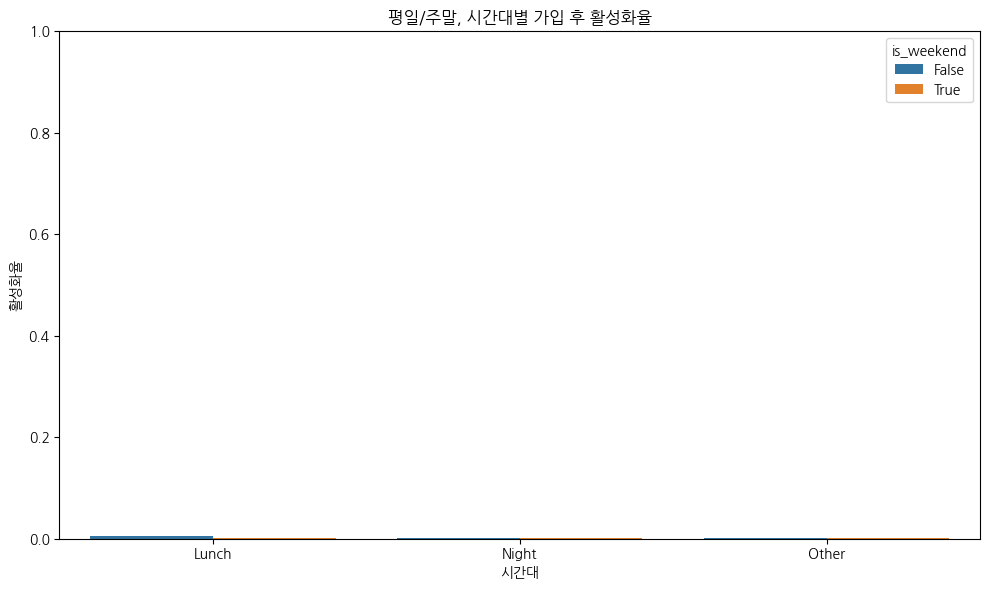

In [47]:
# 평일/주말, 시간대별 가입자 수 및 이후 활성화율(예: 첫 활성화 이벤트 발생 비율) 비교

# 1. 가입자 데이터에서 요일/시간대 컬럼 생성
accounts_user['weekday'] = accounts_user['created_at'].dt.day_name()
accounts_user['hour'] = accounts_user['created_at'].dt.hour

# 평일/주말 구분
accounts_user['is_weekend'] = accounts_user['weekday'].isin(['Saturday', 'Sunday'])

# 시간대 구분 (예: 밤(21~6), 점심(11~14), 기타)
def time_slot(hour):
    if 21 <= hour or hour < 6:
        return 'Night'
    elif 11 <= hour < 15:
        return 'Lunch'
    else:
        return 'Other'
accounts_user['time_slot'] = accounts_user['hour'].apply(time_slot)

# 2. 가입자별 첫 활성화(Activation) 이벤트 발생 여부 집계
activation_keys = ['view_lab_tap', 'click_bottom_navigation_questions', 'click_bottom_navigation_timeline'
                   ,'view_timeline_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_lab'
                   , 'skip_question', 'click_question_start', 'view_profile_tap','click_question_ask']

# 가입자 user_id별로 첫 활성화 이벤트 발생 여부
activation_df = signup_users_all_events[signup_users_all_events['event_key'].isin(activation_keys)]
activated_users = activation_df['user_id'].unique()
accounts_user['activated'] = accounts_user['id'].astype(str).isin(activated_users)

# 3. 평일/주말, 시간대별 가입자 수 및 활성화율 집계
summary = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated', 'sum'))
    .reset_index()
)
summary['activation_rate'] = summary['activated'] / summary['signups']

print(summary)

# 4. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary,
    x='time_slot',
    y='activation_rate',
    hue='is_weekend'
)
plt.title('평일/주말, 시간대별 가입 후 활성화율')
plt.ylabel('활성화율')
plt.xlabel('시간대')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

활성화 이벤트(activation_keys)에 포함된 이벤트가 너무 제한적이거나, 실제로 가입 직후 발생하는 이벤트와 맞지 않을 수 있습니다. 또는 'activated' 조건이 너무 엄격할 수 있습니다.

In [48]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at']].copy()
signup_time['created_at'] = pd.to_datetime(signup_time['created_at'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 5분 이내 이벤트 필터링
events['within_5min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=5))
)

# 4. 5분 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_5min'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_5min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_5min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_5min', 'sum'))
    .reset_index()
)
summary_5min['activation_rate'] = summary_5min['activated'] / summary_5min['signups']

print(summary_5min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463          0         0.000000
1       False     Night   210526          2         0.000010
2       False     Other   252269          8         0.000032
3        True     Lunch     5144          1         0.000194
4        True     Night    95251          1         0.000010
5        True     Other   108432          0         0.000000


In [49]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at']].copy()
signup_time['created_at'] = pd.to_datetime(signup_time['created_at'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 10분 이내 이벤트 필터링
events['within_10min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=10))
)

# 4. 10분 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_10min'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_10min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_10min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_10min', 'sum'))
    .reset_index()
)
summary_10min['activation_rate'] = summary_10min['activated'] / summary_10min['signups']

print(summary_10min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463          0         0.000000
1       False     Night   210526          8         0.000038
2       False     Other   252269         11         0.000044
3        True     Lunch     5144          1         0.000194
4        True     Night    95251          1         0.000010
5        True     Other   108432          0         0.000000


In [50]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at']].copy()
signup_time['created_at'] = pd.to_datetime(signup_time['created_at'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 30분 이내 이벤트 필터링
events['within_30min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=30))
)

# 4. 30분 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_30min'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_30min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_30min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_30min', 'sum'))
    .reset_index()
)
summary_30min['activation_rate'] = summary_30min['activated'] / summary_30min['signups']

print(summary_30min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463          0         0.000000
1       False     Night   210526         15         0.000071
2       False     Other   252269         16         0.000063
3        True     Lunch     5144          1         0.000194
4        True     Night    95251          2         0.000021
5        True     Other   108432          3         0.000028


In [51]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at']].copy()
signup_time['created_at'] = pd.to_datetime(signup_time['created_at'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 1시간 이내 이벤트 필터링
events['within_1hour'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(hours=1))
)

# 4. 1시간 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_1hour'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_1hour'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_1hour = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_1hour', 'sum'))
    .reset_index()
)
summary_1hour['activation_rate'] = summary_1hour['activated'] / summary_1hour['signups']

print(summary_1hour)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch     5463          0         0.000000
1       False     Night   210526         19         0.000090
2       False     Other   252269         29         0.000115
3        True     Lunch     5144          1         0.000194
4        True     Night    95251          4         0.000042
5        True     Other   108432          8         0.000074


In [41]:
events_copy = events.copy()
accounts_copy = accounts_user.copy()

In [42]:
def time_event_activation_summary(time_unit: str, amount: int):
    # time_unit: 'minutes' 또는 'hours'
    delta = pd.Timedelta(**{time_unit: amount})  # 동적으로 처리
    

    # 3. 가입 후 지정 시간 이내 이벤트 필터링
    events_copy['within_time'] = (
        (events_copy['event_datetime'] > events_copy['signup_time']) &
        (events_copy['event_datetime'] <= events_copy['signup_time'] + delta)
    )
    
    # 4. 해당 시간 내 이벤트가 있는 user_id 추출
    activated_users = events_copy.loc[events_copy['within_time'], 'user_id'].drop_duplicates()

    # 5. 활성화 여부 컬럼 생성
    accounts_copy['activated_time'] = accounts_copy['id'].astype(str).isin(activated_users)

    # 6. 그룹별 활성화율 집계
    summary_time = (
        accounts_copy
        .groupby(['is_weekend', 'time_slot'])
        .agg(signups=('id', 'count'), activated=('activated_time', 'sum'))
        .reset_index()
    )
    summary_time['activation_rate'] = summary_time['activated'] / summary_time['signups']
    
    print(f"== 가입 후 {amount} {time_unit} 내 활성화 ==")
    print(summary_time)
    print("="*60)

In [43]:
time_event_activation_summary('minutes', 5)
time_event_activation_summary('minutes', 10)
time_event_activation_summary('minutes', 30)
time_event_activation_summary('hours', 1)

== 가입 후 5 minutes 내 활성화 ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        104         0.001928
1       False     Night   178965        239         0.001335
2       False     Other   211760        276         0.001303
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         76         0.000767
5        True     Other    95425         83         0.000870
== 가입 후 10 minutes 내 활성화 ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105         0.001947
1       False     Night   178965        240         0.001341
2       False     Other   211760        278         0.001313
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         76         0.000767
5        True     Other    95425         83         0.000870
== 가입 후 30 minutes 내 활성화 ==
   is_weekend time_slot  signups  activated  activation_rate
0 

가입 후 5~60분까지의 반응을 분석한 결과, 대부분의 유저는 가입 이후 아무 이벤트도 발생시키지 않는 것으로 나타났습니다.       
시간 기준을 5분 → 1시간으로 넓혀도 활성화율 증가는 0.001%p 수준에 불과했습니다.

특히, 평일에 비해 주말 유저의 활성화율이 더 낮아, 유입 품질 또는 초기 온보딩 구조 개선이 필요해 보입니다.       
이는 단순한 대기 시간의 문제라기보다는, 근본적으로 '가입만 하고 이탈하는 유저' 비중이 높은 것으로 해석됩니다.

In [44]:
# 1. 실험실 탭 진입 이벤트를 정의 (예: 'view_lab_tap' 또는 'click_bottom_navigation_lab' 등)
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']

# 2. 회원가입 완료한 유저(user_id) 중 실험실 탭에 한번이라도 들어간 유저 추출
lab_users = signup_users_all_events[signup_users_all_events['event_key'].isin(lab_tab_events)]['user_id'].unique()

# 3. 전체 회원가입 완료 유저 수
total_signup_users = accounts_user['id'].astype(str).nunique()

# 4. 실험실 탭 진입 유저 수
lab_users_count = len(lab_users)

# 5. 비율 계산
lab_user_ratio = lab_users_count / total_signup_users * 100
print(f"회원가입 완료 유저 중 실험실 탭에 한번이라도 들어간 유저 비율: {lab_user_ratio:.2f}% ({lab_users_count}/{total_signup_users})")

# 6. 실험실 탭 진입 유저의 회원가입 일자 추출
lab_users_signup_dates = accounts_user[accounts_user['id'].astype(str).isin(lab_users)][['id', 'created_at_plus_9']]
print("실험실 탭 진입 유저의 회원가입 일자(상위 10개):")
print(lab_users_signup_dates.head(10))

회원가입 완료 유저 중 실험실 탭에 한번이라도 들어간 유저 비율: 0.13% (903/677085)
실험실 탭 진입 유저의 회원가입 일자(상위 10개):
             id          created_at_plus_9
72498    923658 2023-05-06 23:58:56.451591
113297   967617 2023-05-07 21:59:18.841842
149013  1006061 2023-05-08 20:39:06.627464
326836  1199005 2023-05-13 14:34:29.760474
342954  1216565 2023-05-13 21:00:16.936982
387777  1265729 2023-05-14 22:43:19.358770
400739  1279934 2023-05-15 15:16:11.978139
441807  1324867 2023-05-16 21:27:32.600137
502317  1391728 2023-05-20 00:51:35.212829
631289  1534869 2023-05-28 16:56:12.336732


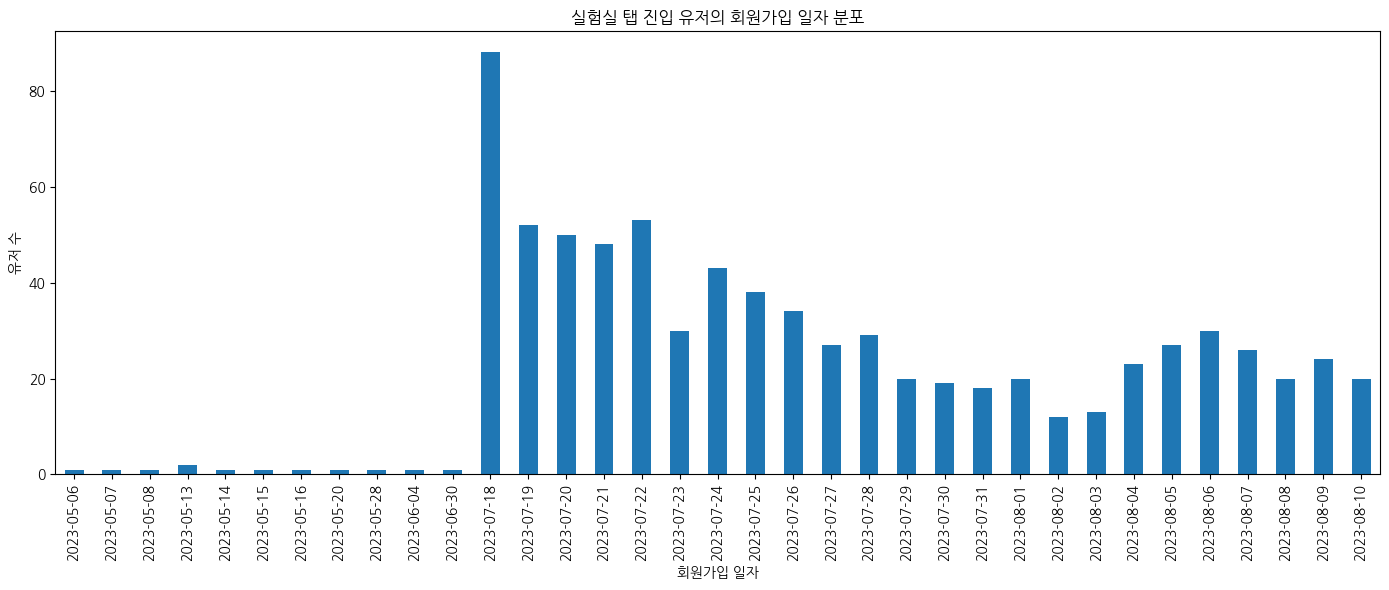

실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 평균 소요 시간: 1528.93분
실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 중앙값 소요 시간: 1.34분


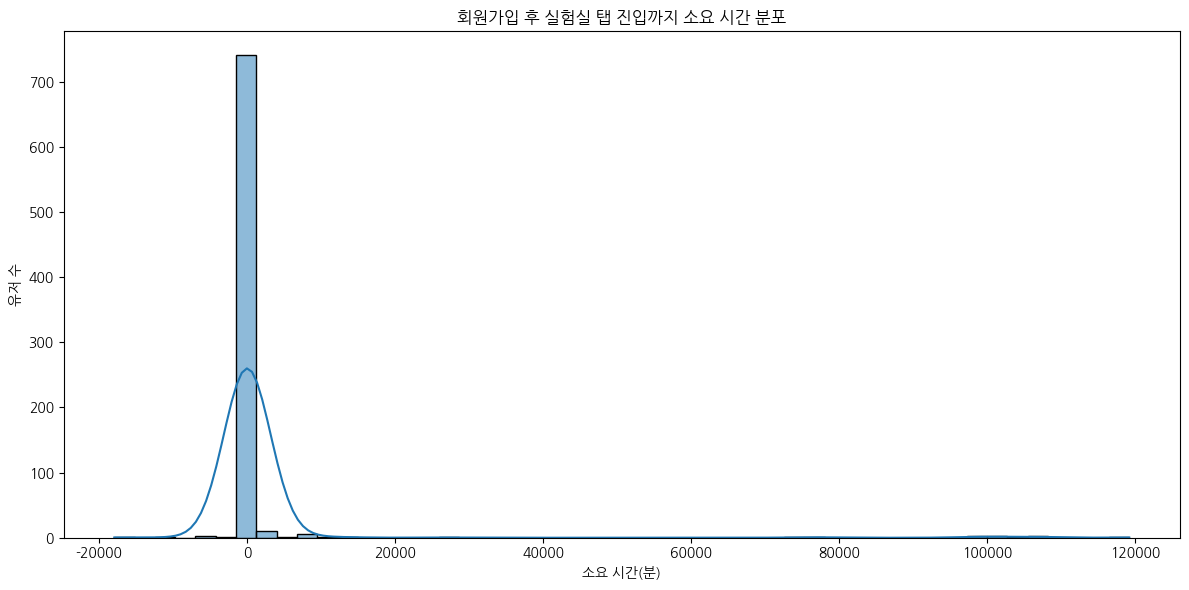

In [45]:
# 실험실 탭 진입 유저의 회원가입 일자 시각화
plt.figure(figsize=(14, 6))
lab_users_signup_dates['created_at_plus_9'].dt.date.value_counts().sort_index().plot(kind='bar')
plt.title('실험실 탭 진입 유저의 회원가입 일자 분포')
plt.xlabel('회원가입 일자')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

# 실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 걸린 시간(분) 계산
# 1. 실험실 탭 진입 이벤트만 추출
lab_events = signup_users_all_events[signup_users_all_events['user_id'].isin(lab_users) &
                                    signup_users_all_events['event_key'].isin(lab_tab_events)].copy()

# 2. 회원가입 일자 정보 merge
lab_events = lab_events.merge(
    lab_users_signup_dates.rename(columns={'id': 'user_id'}),
    on='user_id',
    how='left'
)

# 3. 회원가입 후 실험실 탭 진입까지 걸린 시간(분) 계산 (최초 진입만)
lab_events['signup_to_lab_min'] = (lab_events['event_datetime'] - lab_events['created_at_plus_9']).dt.total_seconds() / 60
first_lab_events = lab_events.sort_values(['user_id', 'event_datetime']).groupby('user_id').first()

# 4. 평균, 중앙값 출력
mean_time = first_lab_events['signup_to_lab_min'].mean()
median_time = first_lab_events['signup_to_lab_min'].median()
print(f"실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 평균 소요 시간: {mean_time:.2f}분")
print(f"실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 중앙값 소요 시간: {median_time:.2f}분")

# 5. 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(first_lab_events['signup_to_lab_min'], bins=50, kde=True)
plt.title('회원가입 후 실험실 탭 진입까지 소요 시간 분포')
plt.xlabel('소요 시간(분)')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

In [46]:
# 1. 실험실 관련 이벤트가 7월 18일 이전에 있었는지 확인
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']
lab_events_before_july18 = signup_users_events[ 
    (signup_users_events['event_key'].isin(lab_tab_events)) &
    (signup_users_events['event_datetime'] < pd.Timestamp('2023-07-18'))
]
print(f"7월 18일 이전 실험실 관련 이벤트 수: {len(lab_events_before_july18)}")
if not lab_events_before_july18.empty:
    display(lab_events_before_july18[['event_datetime', 'event_key', 'user_id']].head())

7월 18일 이전 실험실 관련 이벤트 수: 0


In [47]:
# signup_users_events 데이터프레임에서 가장 많이 발생한 이벤트 확인
event_counts = signup_users_events['event_key'].value_counts()
print("가장 많이 발생한 이벤트 Top 10:")
print(event_counts.head(10))

가장 많이 발생한 이벤트 Top 10:
event_key
view_lab_tap                         21946
view_timeline_tap                    21016
click_question_open                  19641
launch_app                           14839
$session_start                       13603
click_bottom_navigation_questions    13243
skip_question                        13161
$session_end                         12075
click_bottom_navigation_profile      11866
click_bottom_navigation_timeline      8273
Name: count, dtype: int64


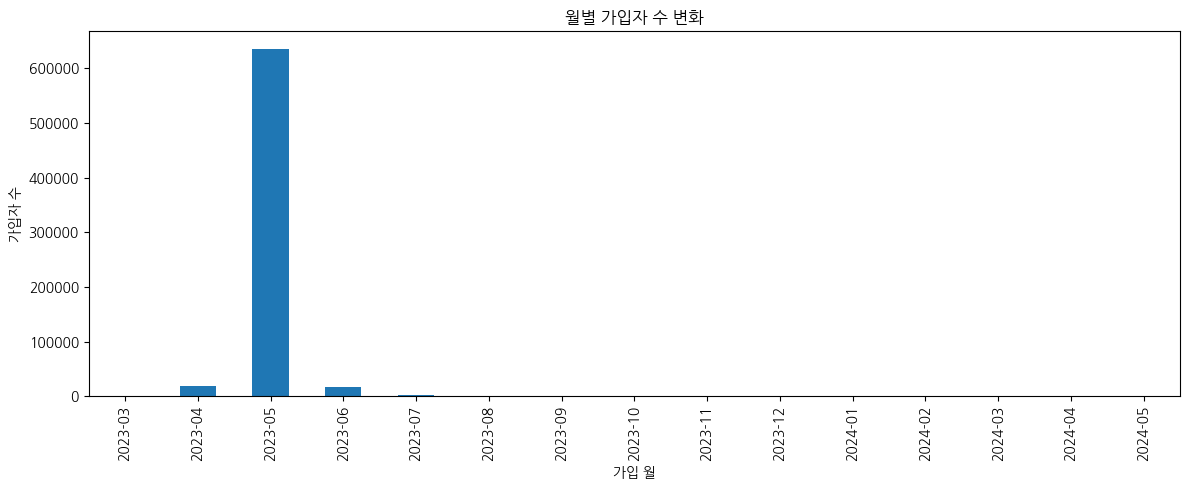

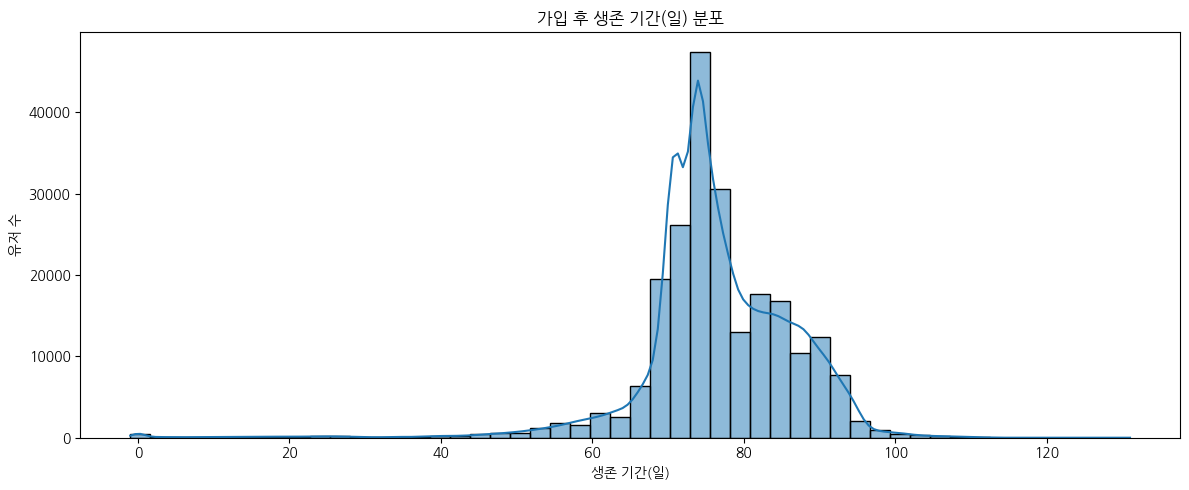

생존 기간 평균: 76.40일
생존 기간 중간값: 75.00일
30일 이상 잔존 유저 수: 125175


In [55]:
# 가입자 수 변화(5~6월 급증) 및 가입 후 생존 기간, 장기 잔존 유저 코호트 정의

# accounts_user: vote 데이터(가입자 정보)
# final_hackle_df: 행동 로그 데이터

# 1. 가입자 수 변화 (월별)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_signup_counts = accounts_user.groupby('signup_month').size()
plt.figure(figsize=(12, 5))
monthly_signup_counts.plot(kind='bar')
plt.title('월별 가입자 수 변화')
plt.xlabel('가입 월')
plt.ylabel('가입자 수')
plt.tight_layout()
plt.show()

# 2. 가입 후 생존 기간 계산 (최종 이벤트 시각 - 가입 시각)
user_last_event = final_hackle_df.groupby('user_id')['event_datetime'].max()
accounts_user['user_id'] = accounts_user['id'].astype(str)
accounts_user['last_event_time'] = accounts_user['user_id'].map(user_last_event)
accounts_user['survival_days'] = (accounts_user['last_event_time'] - accounts_user['created_at_plus_9']).dt.days

# 3. 생존 기간별 유저의 수 시각화 및 통계치 출력
plt.figure(figsize=(12, 5))
sns.histplot(accounts_user['survival_days'].dropna(), bins=50, kde=True)
plt.title('가입 후 생존 기간(일) 분포')
plt.xlabel('생존 기간(일)')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

# 생존 기간의 평균, 중간값 계산
mean_survival = accounts_user['survival_days'].mean()
median_survival = accounts_user['survival_days'].median()
print(f"생존 기간 평균: {mean_survival:.2f}일")
print(f"생존 기간 중간값: {median_survival:.2f}일")

# 4. 장기 잔존 유저(예: 가입 후 30일 이상 활동) 정의
accounts_user['is_retained_median_day'] = accounts_user['survival_days'] >= median_survival
retained_users = accounts_user.loc[accounts_user['is_retained_median_day'], 'user_id'].tolist()
print(f"30일 이상 잔존 유저 수: {len(retained_users)}")

In [53]:
# 잔존 유저의 행동 패턴 분석 (final_hackle 데이터)
retained_events = final_hackle_df[final_hackle_df['user_id'].isin(retained_users)].copy()

# 잔존 유저의 주요 이벤트 빈도
top_events = retained_events['event_key'].value_counts().head(10)
print("잔존 유저 주요 이벤트 Top 10:")
print(top_events)

# # 잔존 유저별 첫 10개 이벤트 시퀀스
# retained_event_sequences = (
#     retained_events.sort_values(['user_id', 'event_datetime'])
#     .groupby('user_id')['event_key']
#     .apply(lambda x: list(x.head(10)))
# )
# print("잔존 유저 첫 10개 이벤트 시퀀스 예시:")
# print(retained_event_sequences.head())

잔존 유저 주요 이벤트 Top 10:
event_key
view_lab_tap                         735569
view_timeline_tap                    715591
launch_app                           575388
$session_start                       573226
click_question_open                  463651
click_bottom_navigation_questions    414263
$session_end                         377129
click_bottom_navigation_profile      372031
click_bottom_navigation_timeline     308316
skip_question                        288797
Name: count, dtype: int64


In [50]:
question_key = []
for key in list(final_hackle_df.event_key.unique()):
    if "question" in key:
        question_key.append(key)
question_key

['click_question_open',
 'click_bottom_navigation_questions',
 'view_questions_tap',
 'click_question_share',
 'complete_question',
 'click_question_start',
 'skip_question',
 'click_question_ask']

In [51]:
question_key = [event_name for event_name in list(final_hackle_df.event_key.unique()) if "question" in event_name]

In [66]:
# 유저별 회원가입 일자, vote 데이터 내 마지막 날짜, hackle event 내 마지막 날짜, 그리고 더 늦은 쪽/소스/이벤트 정보 구하기

# 1. 회원가입 일자 (accounts_user)
user_signup_dates = accounts_user[['user_id', 'created_at_plus_9']].copy()
user_signup_dates['created_at_plus_9'] = pd.to_datetime(user_signup_dates['created_at_plus_9'])

# 2. vote 데이터 내 마지막 날짜 (user_question_df)
vote_last_event = (
    user_question_df.groupby('user_id')['created_at']
    .max()
    .rename('vote_last_event')
)

# 3. hackle event 내 마지막 날짜 (final_hackle_df)
hackle_last_event = (
    final_hackle_df.groupby('user_id')[['event_datetime', 'event_key']]
    .apply(lambda df: df.loc[df['event_datetime'].idxmax(), ['event_datetime', 'event_key']])
)
hackle_last_event = hackle_last_event.rename({'event_datetime': 'hackle_last_event', 'event_key': 'hackle_last_event_key'}, axis=1)

# 4. 병합
user_life_df = user_signup_dates.set_index('user_id').join(vote_last_event).join(hackle_last_event)

# 5. 가장 늦은 날짜, 소스, 이벤트 정보
def get_last_info(row):
    vote_time = row['vote_last_event']
    hackle_time = row['hackle_last_event']
    if pd.isna(vote_time) and pd.isna(hackle_time):
        return pd.Series([pd.NaT, None, None])
    if pd.isna(vote_time) or (not pd.isna(hackle_time) and hackle_time > vote_time):
        return pd.Series([hackle_time, 'hackle', row['hackle_last_event_key']])
    else:
        return pd.Series([vote_time, 'vote', None])

user_life_df[['last_event_time', 'last_event_source', 'last_event_key']] = user_life_df.apply(get_last_info, axis=1)

# 결과 예시 출력
display(user_life_df[['created_at_plus_9', 'vote_last_event', 'hackle_last_event', 'last_event_time', 'last_event_source', 'last_event_key']].head(10))

KeyboardInterrupt: 

5월, 7월 질문 활성화율:
2023-05    0.007542
2023-07    0.209930
Freq: M, Name: user_id, dtype: float64


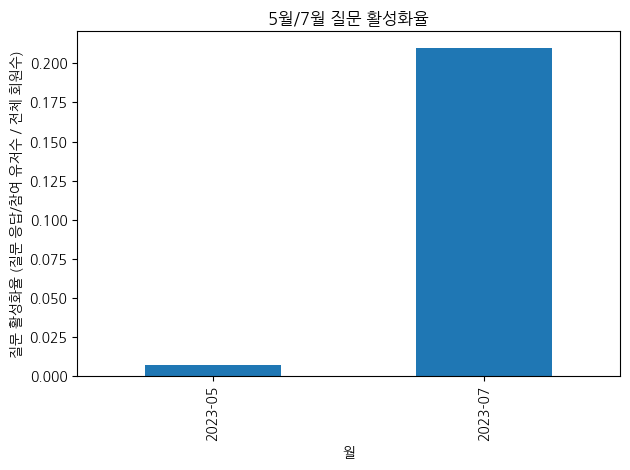

In [64]:
# vote 내 테이블 중 질문 응답/참여 기록이 있는 테이블을 사용 (예: accounts_userquestionrecord)
# 1. 질문에 응답/참여한 유저 추출
user_question_df = df_dict['accounts_userquestionrecord']
user_question_df['user_id'] = user_question_df['user_id'].astype(str)

# 2. 월별로 질문에 응답/참여한 유저 수 집계 (중복 제거)
user_question_df['answer_month'] = user_question_df['created_at'].dt.to_period('M')
monthly_active_users = user_question_df.groupby('answer_month')['user_id'].nunique()

# 3. 월별 전체 회원 수 집계 (accounts_user 기준)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_total_users = accounts_user.groupby('signup_month')['user_id'].nunique()

# 4. 월별 질문 활성화율 (질문 응답/참여 유저 수 / 전체 회원 수)
question_activation_rate = (monthly_active_users / monthly_total_users).fillna(0)

# 5. 5월, 7월만 추출
activation_rate_5_7 = question_activation_rate.loc[['2023-05', '2023-07']]
print("5월, 7월 질문 활성화율:")
print(activation_rate_5_7)

# 6. 시각화
activation_rate_5_7.plot(kind='bar', title='5월/7월 질문 활성화율')
plt.ylabel('질문 활성화율 (질문 응답/참여 유저수 / 전체 회원수)')
plt.xlabel('월')
plt.tight_layout()
plt.show()

In [65]:
monthly_active_users

answer_month
2023-04     338
2023-05    4797
2023-06    1872
2023-07     389
2023-08     170
2023-09     178
2023-10      46
2023-11      22
2023-12      26
2024-01      19
2024-02       9
2024-03      13
2024-04       4
2024-05       6
Freq: M, Name: user_id, dtype: int64

5월, 7월 투표율:
2023-05       0.000000
2023-07    1043.281166
Freq: M, dtype: float64


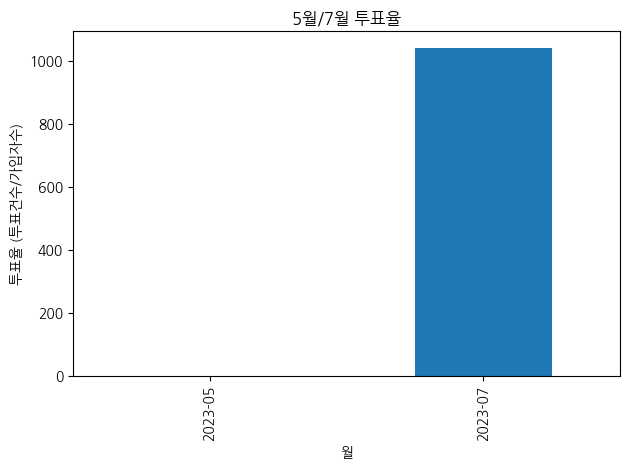

In [63]:
# 1. 투표 이벤트만 추출 (event_key가 실제 투표를 의미하는 값으로 변경)
vote_events = final_hackle_df[final_hackle_df['event_key'].isin(question_key)].copy()

# 2. 월별 투표 건수 집계
vote_events['vote_month'] = vote_events['event_datetime'].dt.to_period('M')
monthly_vote_counts = vote_events.groupby('vote_month').size()

# 3. 월별 회원가입자 수 집계 (accounts_user 기준)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_signup_counts = accounts_user.groupby('signup_month').size()

# 4. 월별 투표율 계산 (투표 건수 / 가입자 수)
vote_rate = (monthly_vote_counts / monthly_signup_counts).fillna(0)

# 5. 5월, 7월만 추출
vote_rate_5_7 = vote_rate.loc[['2023-05', '2023-07']]
print("5월, 7월 투표율:")
print(vote_rate_5_7)

# 6. 시각화
vote_rate.loc[['2023-05', '2023-07']].plot(kind='bar', title='5월/7월 투표율')
plt.ylabel('투표율 (투표건수/가입자수)')
plt.xlabel('월')
plt.tight_layout()
plt.show()

In [ ]:
# 두 데이터 연결(유저 ID 기준)
# accounts_user와 final_hackle_df 모두 user_id로 조인 가능
# 초기 행동 패턴 → 잔존과의 관계 분석을 위한 데이터프레임 예시
user_behavior = accounts_user[['user_id', 'created_at_plus_9', 'is_retained_30d']].merge(
    final_hackle_df, on='user_id', how='left'
)
print(user_behavior.head())

## launch_app -> view_signup 사이 발생하는 일들에 대해서
---

In [59]:
# 우선 회원가입에 무관하게(회원가입을 완료하였는가에 대해서 무관하게)
# "view_signup" 이벤트가 있는 session_id 추출
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'session_id'].unique()

# 해당 session_id의 모든 이벤트 추출
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# 각 session_id별로 "launch_app" 이벤트가 존재하는지 확인
has_launch_app = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "view_signup"이 있는 session_id 중 "launch_app"이 없는 session_id 개수
num_sessions_without_launch_app = (~has_launch_app).sum()
print(f'"view_signup" session 중 "launch_app"이 없는 session 수: {num_sessions_without_launch_app}')

# "view_signup" 이벤트가 발생한 시점 이전에 "launch_app"이 있었는지 확인
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'view_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 launch_app이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_sessions_all_events.groupby('session_id').apply(launch_app_before_signup)
num_sessions_without_launch_app_before = (~launch_app_before).sum()
print(f'"view_signup" session 중 "view_signup" 이전에 "launch_app"이 없는 session 수: {num_sessions_without_launch_app_before}')
num_sessions_with_launch_app_before = (launch_app_before).sum()
print(f'"view_signup" session 중 "view_signup" 이전에 "launch_app"이 있는 session 수: {num_sessions_with_launch_app_before}')

"view_signup" session 중 "launch_app"이 없는 session 수: 11
"view_signup" session 중 "view_signup" 이전에 "launch_app"이 없는 session 수: 37
"view_signup" session 중 "view_signup" 이전에 "launch_app"이 있는 session 수: 6649


In [60]:
# launch_app 을 가진 session 아이디와 user_id 유니크 값

print(f"launch_app 이벤트를 가진 유니크한 session_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'launch_app', 'session_id'].nunique()}")
print(f"launch_app 이벤트를 가진 유니크한 user_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'launch_app', 'user_id'].nunique()}")
print()
print(f"view_signup 이벤트를 가진 유니크한 session_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'session_id'].nunique()}")
print(f"view_signup 이벤트를 가진 유니크한 user_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'user_id'].nunique()}")

launch_app 이벤트를 가진 유니크한 session_id : 242211
launch_app 이벤트를 가진 유니크한 user_id : 239538

view_signup 이벤트를 가진 유니크한 session_id : 6686
view_signup 이벤트를 가진 유니크한 user_id : 6664
